In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.datasets import make_classification

### Tratando a base

In [116]:
base = pd.read_csv(r'C:\Users\jonathan.perez\Documents\2. ESTUDOS\3. DADOS\livro - metodos multivariados de analise estatistica\Outros Dados\Capítulo 10\SR.csv')
base = base[['Obito','idade', 'sexo', 'raca', 'faltar', 'olfpal', 'febre0', 'tosse0', 'garganta0', 'diarreia0', 'vomito0', 'fadiga0', 'dor_abd0', 'vacina0']]

#TRANSFORMANDO COLUNAS EM DUMMIES
#1. base['raca'] = base.raca.astype(str)
base['raca'] = base['raca'].replace({1: 'branco', 2: 'preto', 3: 'amarelo', 4:'pardo', 5:'indigena'})

#2. Converter a coluna 'Categoria' em variáveis dummy
base = pd.get_dummies(base, columns=['raca'], dtype = 'int')\
    .drop(columns=['raca_branco']) #excluindo a coluna dummie que sera a referencia

base.head(5)

C:\Users\jonathan.perez\AppData\Local\Temp\ipykernel_20280\4190702541.py:1: DtypeWarning: Columns (115,117,118,119) have mixed types. Specify dtype option on import or set low_memory=False.
  base = pd.read_csv(r'C:\Users\jonathan.perez\Documents\2. ESTUDOS\3. DADOS\livro - metodos multivariados de analise estatistica\Outros Dados\Capítulo 10\SR.csv')


,Obito,idade,sexo,faltar,olfpal,febre0,tosse0,garganta0,diarreia0,vomito0,fadiga0,dor_abd0,vacina0,raca_amarelo,raca_indigena,raca_pardo,raca_preto
0,1,63,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
1,1,85,1,1,0,1,1,1,0,0,0,0,0,0,0,1,0
2,1,86,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
3,1,54,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,74,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0


## Modelo logistico

### Criando Modelo

In [117]:
import statsmodels.api as sm

In [118]:
y = base.iloc[:, 0]   # Dependente
X = base.iloc[:, 1:]  # Independente

# Dividindo os dados em treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.26399, random_state=20192024)

X_treino = sm.add_constant(X_treino)  # Adiciona uma coluna de 1s para o intercepto

# Ajustando o modelo de regressão logística
model = sm.Logit(y_treino, X_treino)
result = model.fit()

# Resultados do modelo
result.summary()

Optimization terminated successfully.
         Current function value: 0.322782
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Obito   No. Observations:                27879
Model:                          Logit   Df Residuals:                    27862
Method:                           MLE   Df Model:                           16
Date:                Fri, 27 Dec 2024   Pseudo R-squ.:                 0.05686
Time:                        14:07:24   Log-Likelihood:                -8998.8
converged:                       True   LL-Null:                       -9541.4
Covariance Type:            nonrobust   LLR p-value:                6.575e-221
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5151      0.111      4.633      0.000       0.297       0.733
idade             0.0071      0.001      5.386      0.000       0.005       0.010
sexo             -0.0760      0.040     -1.906      0.057      -0.154       0.002
faltar            0.3382      0.056      5.989      0.000       0.228       0.449
olfpal            0.7867      0.089      8.855      0.000       0.613       0.961
febre0            0.5568      0.042     13.296      0.000       0.475       0.639
tosse0            0.6013      0.042     14.456      0.000       0.520       0.683
garganta0         0.4145      0.067      6.174      0.000       0.283       0.546
diarreia0         0.4076      0.068      5.971      0.000       0.274       0.541
vomito0          -0.3134      0.070     -4.462      0.000      -0.451      -0.176
fadiga0           0.0458      0.048      0.950      0.342      -0.049       0.140
dor_abd0         -0.4867      0.075     -6.495      0.000      -0.634      -0.340
vacina0           0.0253      0.044      0.577      0.564      -0.061       0.111
raca_amarelo      0.1438      0.192      0.747      0.455      -0.233       0.521
raca_indigena     1.3635      0.589      2.314      0.021       0.208       2.519
raca_pardo        0.2499      0.043      5.812      0.000       0.166       0.334
raca_preto       -0.0551      0.084     -0.657      0.511      -0.219       0.109
=================================================================================
"""

### Testando Modelo

#### Curva ROC

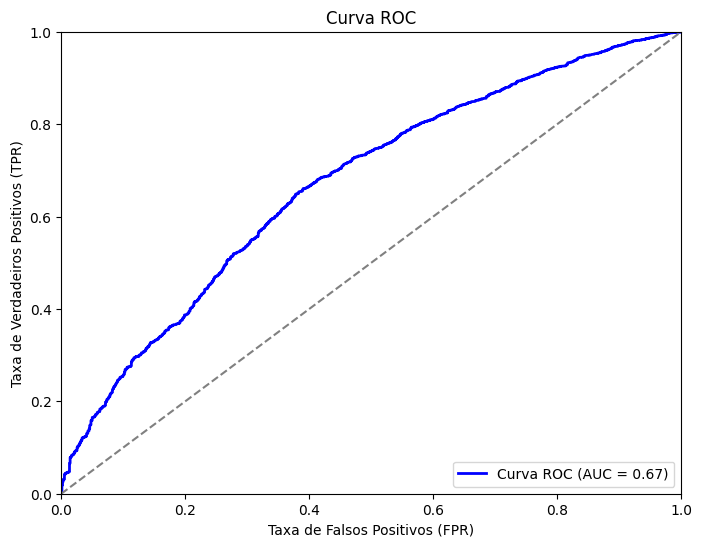

In [119]:
from sklearn.metrics import roc_curve, auc

# Prevendo os valores de y com um limiar de 0.5
y_pred_prob = result.predict(sm.add_constant(X_teste))

# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_teste, y_pred_prob)

# Calcular a AUC (Área Sob a Curva)
roc_auc = auc(fpr, tpr)

# Plotando a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Linha diagonal (chance)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

     corte     1_esp       esp       sen
0     0.00  1.000000  0.000000  1.000000
1     0.01  1.000000  0.000000  1.000000
2     0.02  1.000000  0.000000  1.000000
3     0.03  1.000000  0.000000  1.000000
4     0.04  1.000000  0.000000  1.000000
..     ...       ...       ...       ...
96    0.96  0.028513  0.971487  0.103349
97    0.97  0.013238  0.986762  0.050122
98    0.98  0.001018  0.998982  0.015635
99    0.99  0.000000  1.000000  0.000776
100   1.00  0.000000  1.000000  0.000000

[101 rows x 4 columns]


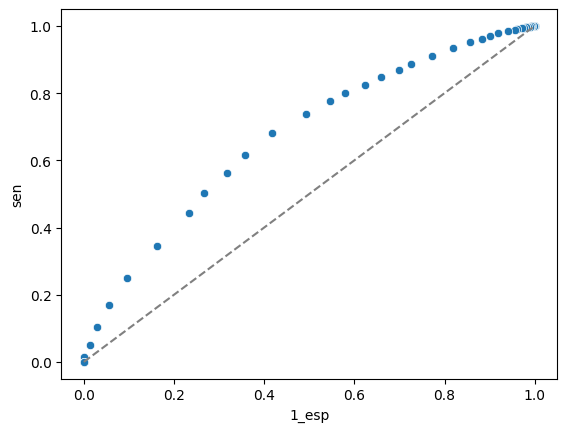

In [162]:
def roc_curva(real, previsto):
    base = pd.DataFrame(columns=['corte', '1_esp', 'esp', 'sen'])

    for corte in np.arange(0, 1.01, 0.01):
        controle = pd.DataFrame(
            {
                'real': real,
                'previsto': (previsto > corte).astype(float) 
            }
        )

        s = controle[(controle.real == 1) & (controle.previsto == 1)].shape[0] #sensibilidade
        e = controle[(controle.real == 0) & (controle.previsto == 0)].shape[0] #espicificidade
        
        Ts = controle[(controle.real == 1)].shape[0] #total sim real
        Tn = controle[(controle.real == 0)].shape[0] #total nao real

        base.loc[len(base)] = [corte, 1 - e/Tn, e/Tn, s/Ts]

    return(base)
    

print(roc_curva(y_teste, y_pred_prob))
sns.scatterplot(roc_curva(y_teste, y_pred_prob), x='1_esp', y='sen')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

#### Curva ROC Aleatoria

    corte     1_esp       esp       sen
0    0.00  1.000000  0.000000  1.000000
1    0.05  0.953157  0.046843  0.947771
2    0.10  0.904277  0.095723  0.898314
3    0.15  0.856415  0.143585  0.845420
4    0.20  0.803462  0.196538  0.794855
5    0.25  0.746436  0.253564  0.745731
6    0.30  0.680244  0.319756  0.698048
7    0.35  0.631365  0.368635  0.651253
8    0.40  0.586558  0.413442  0.603903
9    0.45  0.543788  0.456212  0.549235
10   0.50  0.498982  0.501018  0.495675
11   0.55  0.456212  0.543788  0.444666
12   0.60  0.398167  0.601833  0.394544
13   0.65  0.345214  0.654786  0.344311
14   0.70  0.294297  0.705703  0.294300
15   0.75  0.252546  0.747454  0.243513
16   0.80  0.201629  0.798371  0.193169
17   0.85  0.136456  0.863544  0.141938
18   0.90  0.096741  0.903259  0.094034
19   0.95  0.044807  0.955193  0.047128
20   1.00  0.000000  1.000000  0.000000


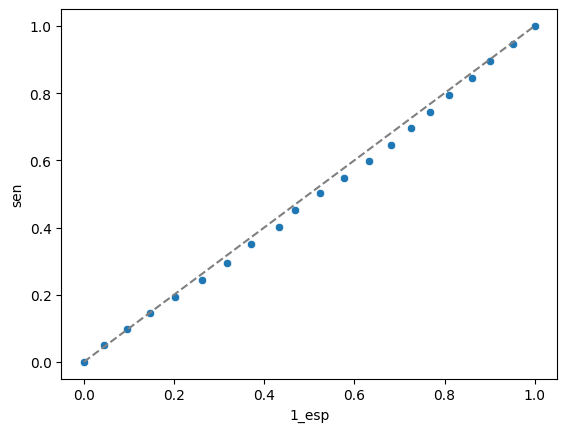

In [160]:
def teste_roc_curva_aleatoria(real):
    base = pd.DataFrame(columns=['corte', '1_esp', 'esp', 'sen'])
    n = len(real)

    previsto = np.random.uniform(0, 1, n).tolist()
    #previsto = random.choices([1, 0], k=n)

    for corte in np.arange(0, 1.01, 0.05):
        controle = pd.DataFrame(
            {
                'real': real,
                'previsto': (previsto > corte).astype(float) 
                #'previsto': previsto
            }
        )

        s = controle[(controle.real == 1) & (controle.previsto == 1)].shape[0] #sensibilidade
        e = controle[(controle.real == 0) & (controle.previsto == 0)].shape[0] #espicificidade
        
        Ts = controle[(controle.real == 1)].shape[0] #total sim real
        Tn = controle[(controle.real == 0)].shape[0] #total nao real

        base.loc[len(base)] = [corte, 1 - e/Tn, e/Tn, s/Ts]

    return(base)
    

print(teste_roc_curva_aleatoria(y_teste))

sns.scatterplot(teste_roc_curva_aleatoria(y_teste), x='1_esp', y='sen')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

#### Metricas

In [300]:
#matriz de confucao
def matriz_confucao(real, previsto, corte=0.5):
        
    controle = pd.DataFrame(
        {
            'real': real,
            'previsto': (previsto > corte).astype(int)
        }
    )
    
    #adicionando casos que nao existem na base
    novas_linhas = pd.DataFrame([[0, 0], [0, 1], [1, 0], [1, 1]], columns=['real', 'previsto'])
    controle = pd.concat([controle, novas_linhas], ignore_index=True)
    
    #criando a tabela 2x2 e retirando os casos que nao existem na tabela 
    mt_confucao = pd.crosstab(controle['real'], controle['previsto']) - 1

    #adicionando os totais marginais
    mt_confucao.loc['Total', :] = mt_confucao.sum()
    mt_confucao['Total'] = mt_confucao.sum(axis=1)

    return(mt_confucao.astype(int))

matriz_confucao(y_teste, y_pred_prob, 0.71)

previsto,0,1,Total
real,,,
0,27,955,982
1,63,8955,9018
Total,90,9910,10000


In [314]:
def metricas_logistica(real, previsto, corte_inicial=0):
    base = pd.DataFrame(columns=['corte', 'rnpn', 'rsps', 'rnps', 'rspn', 'especificidade', 'sensibilidade', 'pred_negativo', 'pred_positivo', 'acuracia', 'KS'])

    for corte in np.arange(corte_inicial, 1.01, 0.01):
        #1.1 CRIANDO A MATRIZ DE CONFUCAO
        mt_confucao = matriz_confucao(real, previsto, corte)
        rnpn = mt_confucao.iloc[0, 0] #real nao e previsto nao
        rsps = mt_confucao.iloc[1, 1] #real nao e previsto nao
        
        rnps = mt_confucao.iloc[0, 1] #real nao e previsto sim
        rspn = mt_confucao.iloc[1, 0] #real sim e previsto nao

        #1.2 METRICAS GERADAS PELA MATRIZ DE CONFUNCAO
        especificidade = rnpn/mt_confucao.iloc[0, 2] #especificidade
        sensibilidade = rsps/mt_confucao.iloc[1, 2] #sensibilidade

        pnegativo =rnpn/mt_confucao.iloc[2, 0] #preditivo negativo
        ppositivo = rsps/mt_confucao.iloc[2, 1] #preditivo positivo

        acuracia = (mt_confucao.iloc[0, 0] + mt_confucao.iloc[1, 1])/mt_confucao.iloc[2, 2] #acuracia
            
        #2. METRICAS DE CORTE
        ks = sensibilidade + especificidade - 1

        #3. CRIANDO BASE COM AS METRICAS
        base.loc[len(base)] = [corte, rnpn, rsps, rnps, rspn, especificidade, sensibilidade, pnegativo, ppositivo, acuracia, ks]

    return(base)

df_metricas_logistica = metricas_logistica(y_teste, y_pred_prob, corte_inicial=0.71)
df_metricas_logistica

C:\Users\jonathan.perez\AppData\Local\Temp\ipykernel_20280\2999069841.py:18: RuntimeWarning: invalid value encountered in scalar divide
  ppositivo = rsps/mt_confucao.iloc[2, 1] #preditivo positivo
C:\Users\jonathan.perez\AppData\Local\Temp\ipykernel_20280\2999069841.py:18: RuntimeWarning: invalid value encountered in scalar divide
  ppositivo = rsps/mt_confucao.iloc[2, 1] #preditivo positivo


,corte,rnpn,rsps,rnps,rspn,especificidade,sensibilidade,pred_negativo,pred_positivo,acuracia,KS
0,0.71,27.0,8955.0,955.0,63.0,0.027495,0.993014,0.300000,0.903633,0.8982,0.020509
1,0.72,38.0,8934.0,944.0,84.0,0.038697,0.990685,0.311475,0.904434,0.8972,0.029382
2,0.73,44.0,8910.0,938.0,108.0,0.044807,0.988024,0.289474,0.904752,0.8954,0.032830
3,0.74,59.0,8869.0,923.0,149.0,0.060081,0.983477,0.283654,0.905739,0.8928,0.043559
4,0.75,80.0,8819.0,902.0,199.0,0.081466,0.977933,0.286738,0.907211,0.8899,0.059399
5,0.76,98.0,8750.0,884.0,268.0,0.099796,0.970282,0.267760,0.908242,0.8848,0.070078
6,0.77,114.0,8674.0,868.0,344.0,0.116090,0.961854,0.248908,0.909034,0.8788,0.077944
7,0.78,142.0,8574.0,840.0,444.0,0.144603,0.950765,0.242321,0.910771,0.8716,0.095368
8,0.79,177.0,8415.0,805.0,603.0,0.180244,0.933134,0.226923,0.912690,0.8592,0.113378
9,0.80,224.0,8206.0,758.0,812.0,0.228106,0.909958,0.216216,0.915440,0.8430,0.138064


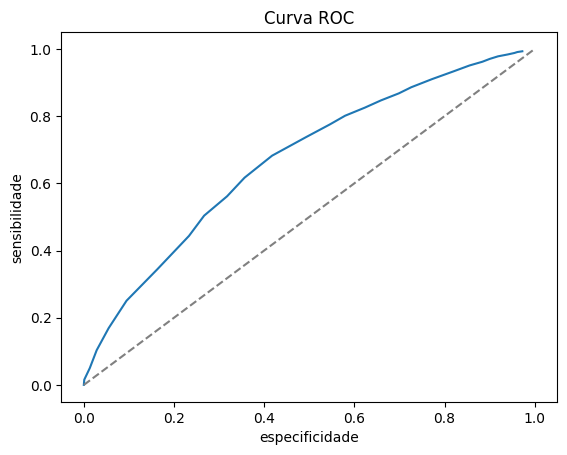

In [315]:
sns.lineplot(df_metricas_logistica, x=1-df_metricas_logistica.especificidade, y='sensibilidade')
plt.title('Curva ROC')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

#### Estatistica KS

In [182]:
classificacao = pd.DataFrame({'real':y_teste, 'classificado': (y_pred_prob > 0.88).astype(int), 'probabilidade': y_pred_prob})
classificacao

,real,classificado,probabilidade
12906,1,1,0.934727
28068,1,0,0.741432
608,1,1,0.944124
13412,1,1,0.937722
17411,1,1,0.886074
...,...,...,...
25569,0,0,0.877134
27600,0,0,0.812982
21846,1,1,0.932041
6429,1,1,0.982237


<Axes: xlabel='probabilidade', ylabel='Density'>

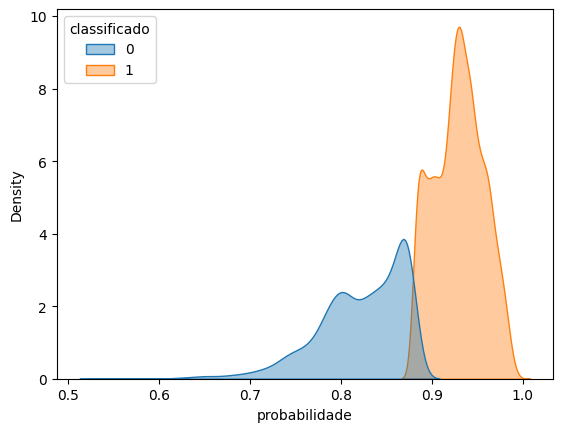

In [183]:
# Criando as curvas de densidade
sns.kdeplot(data=classificacao, x='probabilidade', hue='classificado', fill=True, alpha=0.4)

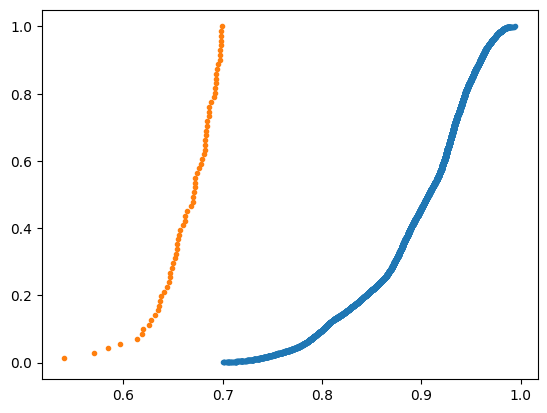

In [174]:
dados_ordenados = np.sort(classificacao[classificacao.classificado == 1].probabilidade)
y = np.arange(1, len(dados_ordenados) + 1) / len(dados_ordenados)
#y = dados_ordenados.cumsum()
plt.plot(dados_ordenados, y, marker='.', linestyle='none')

dados_ordenados = np.sort(classificacao[classificacao.classificado == 0].probabilidade)
y = np.arange(1, len(dados_ordenados) + 1) / len(dados_ordenados)
#y = dados_ordenados.cumsum()
plt.plot(dados_ordenados, y, marker='.', linestyle='none')

In [ ]:
df_ks = roc_curva(y_teste, y_pred_prob)
df_ks['ks'] = df_ks.esp + df_ks.sen

#ponto de corte segundo o criterio ks
df_ks[df_ks.ks == df_ks.ks.max()]

,corte,1_esp,esp,sen,ks
88,0.88,0.417515,0.582485,0.682302,1.264787


## Logistica com lasso

In [ ]:
LogisticRegression(penalty='l1', solver='liblinear')